**Informe: Factores de la Felicidad Mundial**


---


*   Domenica Orozco Damian
*   Belén Vega Espinoza
*   Adriana Martinez Vera




**Objetivo:**
Analizar los factores que explican el bienestar y felicidad de los países a partir del World Happiness Report 2025, mediante instrumentos y técnicas estadísticas como descriptiva, análisis de distribución, correlación y visualización de datos, con el fin de identificar patrones regionales, relaciones bivariados y multivariados entre variables explicativas y proponer recomendaciones basadas en evidencia para mejorar el bienestar social.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import skew


In [ ]:
data= pd.read_excel("/content/WHR25_Data_Figure_2.1v3.xlsx")
num_data = data.select_dtypes(include=['float64', 'int64'])
data = data.drop(columns=["Lower whisker", "Upper whisker"])
data.head()

,Year,Rank,Country name,Life evaluation (3-year average),Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,147,Afghanistan,1.364,0.649,0.0,0.155,0.0,0.075,0.135,0.348
1,2023,143,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,0.645,0.0,0.087,0.0,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,0.758,0.0,0.289,0.0,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,0.370,0.0,0.126,0.0,0.122,0.010,1.895


1.	Evaluación de la vida (promedio de 3 años): Es la medida principal del bienestar o felicidad que el informe utiliza para clasificar a los países.
2.	Log PIB per cápita: Un indicador económico que mide el ingreso promedio por persona en un país, reflejando el nivel de desarrollo material y acceso a bienes y servicios.
3.	Apoyo social: La percepción de los individuos sobre la disponibilidad de ayuda de familiares o amigos en momentos de necesidad, lo que mide la fortaleza de las redes de apoyo social.
4.	Esperanza de vida saludable: El número promedio de años que una persona puede esperar vivir con buena salud, reflejando la calidad del sistema de salud y las condiciones generales de salud pública.
5.	Libertad para tomar decisiones vitales: Mide la percepción de los individuos sobre su capacidad para tomar decisiones personales y profesionales de forma independiente.
6.	Generosidad: La propensión a la caridad y la ayuda mutua, medida por las donaciones recientes, que refleja la cohesión social y el sentido de comunidad.
7.	Percepciones de la corrupción: El nivel de confianza en las instituciones gubernamentales y empresariales, medido por la ausencia de corrupción, lo que indica la calidad de la gobernanza y la estabilidad institucional.
8.	Distopía + Residual: Es la base de la puntuación de felicidad de un país, a la cual se añaden las contribuciones positivas de las otras seis variables para llegar a la puntuación total de evaluación de vida de esa nación. Mientras más alto indica un alto nivel de felicidad que va más allá de lo que los seis factores del modelo predicen.


## 📍| Distribución de las variables

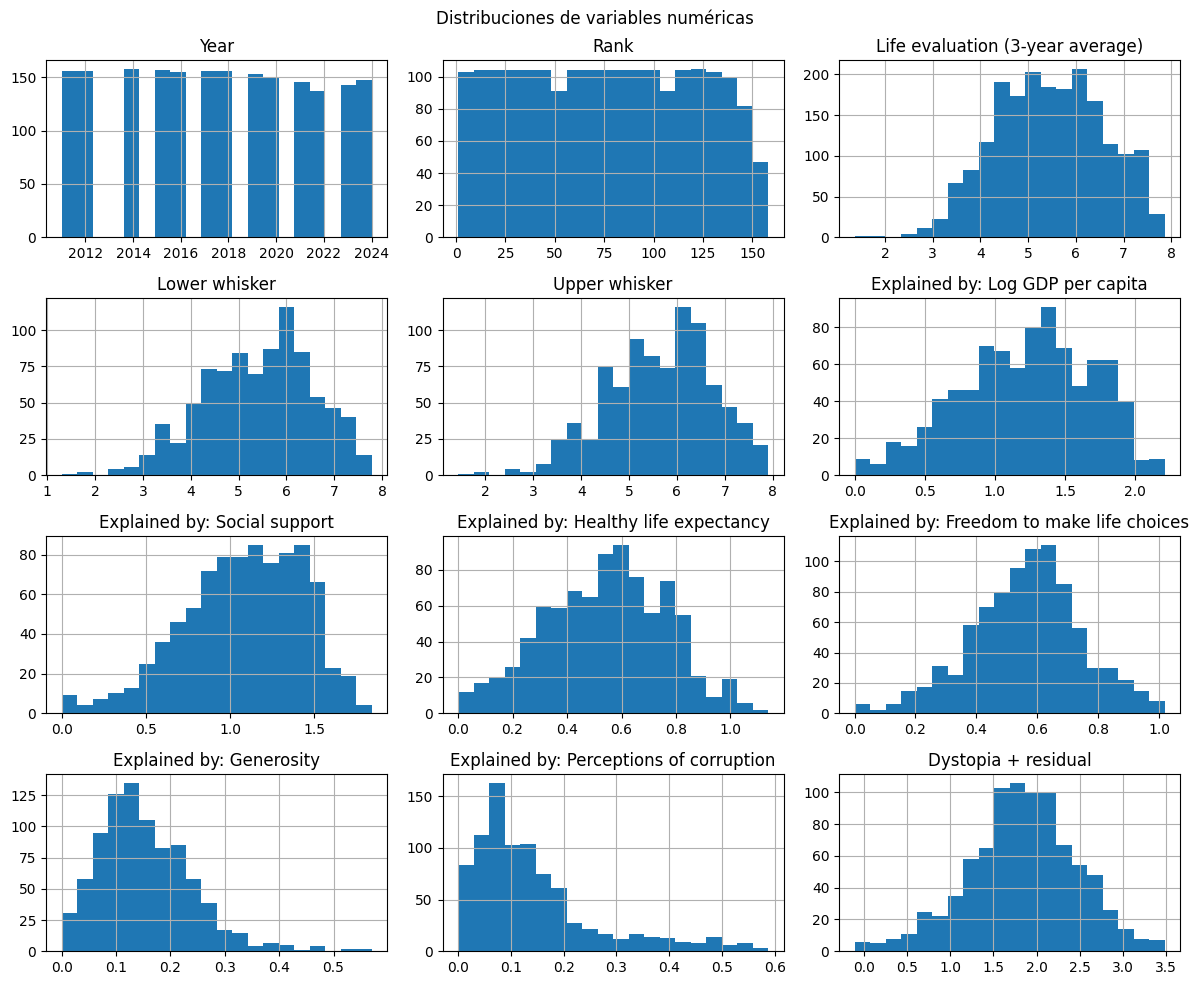

In [ ]:
num_data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribuciones de variables numéricas')
plt.tight_layout()
plt.show()

In [ ]:
variables_numericas = [
    "Life evaluation (3-year average)",
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
    "Dystopia + residual"
]

tabla_descriptiva = data[variables_numericas].describe().T

tabla_descriptiva['var'] = data[variables_numericas].var()

columnas_ordenadas = ['count', 'mean', 'std', 'var', 'min', '25%', '50%', '75%', 'max']
tabla_descriptiva = tabla_descriptiva[columnas_ordenadas]

tabla_descriptiva = tabla_descriptiva.round(2)

tabla_descriptiva

,count,mean,std,var,min,25%,50%,75%,max
Life evaluation (3-year average),1969.0,5.45,1.12,1.26,1.36,4.60,5.46,6.30,7.86
Explained by: Log GDP per capita,872.0,1.22,0.46,0.21,0.00,0.90,1.26,1.57,2.21
Explained by: Social support,872.0,1.08,0.36,0.13,0.00,0.85,1.11,1.36,1.84
Explained by: Healthy life expectancy,870.0,0.54,0.22,0.05,0.00,0.38,0.56,0.70,1.14
Explained by: Freedom to make life choices,871.0,0.56,0.18,0.03,0.00,0.45,0.57,0.68,1.02
Explained by: Generosity,872.0,0.15,0.09,0.01,0.00,0.09,0.14,0.20,0.57
Explained by: Perceptions of corruption,871.0,0.14,0.12,0.01,0.00,0.06,0.11,0.18,0.59
Dystopia + residual,868.0,1.83,0.63,0.40,-0.11,1.46,1.85,2.24,3.48


•	Evaluación de vida (Life evaluation):
Con una moda de 5.411, indica que la puntuación de felicidad que más se repite se encuentra en la parte media de la escala de 0 a 10. Su rango 6.372 confirma la diferencia en la satisfacción de vida entre los países.

•	Menor variabilidad: Las variables Generosity (0.003573 de varianza) y Perceptions of corruption (0.12969 de varianza) presentan la menor dispersión, lo que sugiere que las diferencias entre países son menos pronunciadas para estas métricas que otras, tales como PIB per cápita.


                                            Sesgo  \
Year                                        0.043   
Rank                                        0.018   
Life evaluation (3-year average)           -0.352   
Lower whisker                              -0.330   
Upper whisker                              -0.378   
Explained by: Log GDP per capita           -0.292   
Explained by: Social support               -0.492   
Explained by: Healthy life expectancy      -0.098   
Explained by: Freedom to make life choices -0.216   
Explained by: Generosity                    1.032   
Explained by: Perceptions of corruption     1.524   
Dystopia + residual                        -0.240   

                                                                     Tipo de sesgo  
Year                                        Distribución aproximadamente simétrica  
Rank                                        Distribución aproximadamente simétrica  
Life evaluation (3-year average)                       

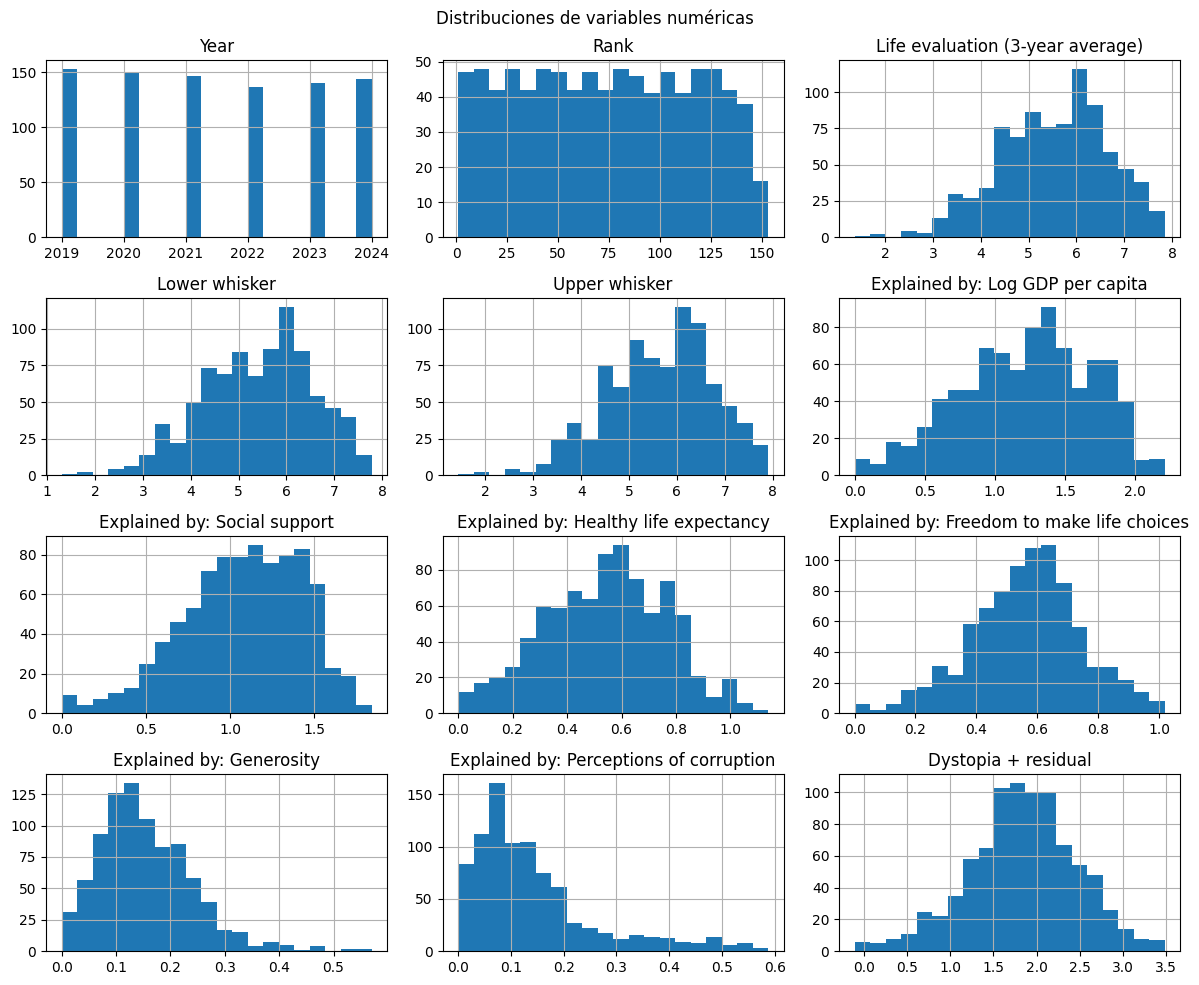

In [ ]:
variables_numericas = num_data.select_dtypes(include='number')

variables_limpias = variables_numericas.dropna()

sesgos = variables_limpias.apply(skew)

clasificacion_sesgo = sesgos.apply(
    lambda x: 'Sesgo positivo (derecha)' if x > 0.3 else
              'Sesgo negativo (izquierda)' if x < -0.3 else
              'Distribución aproximadamente simétrica'
)

resultado_sesgo = pd.DataFrame({
    'Sesgo': sesgos.round(3),
    'Tipo de sesgo': clasificacion_sesgo
})

print(resultado_sesgo)

variables_limpias.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribuciones de variables numéricas')
plt.tight_layout()
plt.show()

Life evaluation (3-year average): Presenta un sesgo negativo, es decir, para la izquierda; ya que la mayoría de los países agrupan sus valores entre el 5 y 7.5 que representan la mejor vida posible de los países, usando como métrica la “Cantril life Ladder” (Escala de Cantril).

Log GPD per cápita: Presentan una distribución casi simétrica, pero en algunos casos se ve que la mayoría de países tiene un log-GDP alto, pero otros países tienen un log-GDP muy bajos.

Social Support: Esta variable, demuestra tener un sesgo negativo a la izquierda, en la que se puede ver mayor acumulación en los valores altos. Esta variable es el promedio nacional de las respuestas de la pregunta “¿Si usted estuviera en problemas, ¿tiene familiares o amigos con quienes pueda contar para que le ayuden siempre que los necesite, o no?”.

Health Life Expectancy: Tiene una distribución aproximadamente simétrica, presentando mayor acumulación de datos en el valor de 0.6. Las métricas de esta variable es la medida de esperanza de vida saludable, usando los indicadores del Desarrollo Mundial.

Freedom to make life choices: Es una variable con una distribución aproximadamente simétrica, en la cual tiene una acumulación de datos en el valor de 0.6. Esta variable es el promedio nacional de la respuesta a la pregunta “¿Está satisfecho o insatisfecho con su libertad para elegir qué hacer con su vida?”

Generosity: Presenta una asimetría hacia la derecha, es decir, positiva, ya que tiene mayor concentración de datos en los valores bajos, alrededor, del valor de 0.1. Esta variable es el resultado del promedio de respuestas de la pregunta: “¿Ha donado dinero a una organización benéfica en el último mes?”

Perceptions of corruption: Tiene una asimetría hacia la derecha, ya que tiene mayor concentración en los valores bajos. Esta variable es el resultado del promedio de respuestas de la pregunta: “¿Está generalizada la corrupción en todo el gobierno o no?” y “¿Está generalizada la corrupción dentro de las empresas o no?”.

Dystopia + residual: Esta variable tiene una distribución aproximadamente simétrica, con una acumulación de datos entre los valores de 1.5 a 2.0. Esta variable tiene los factores que explican la felicidad, que no pueden ser explicados por medio de las variables anteriores.


## 📍 | Correlación de las variables

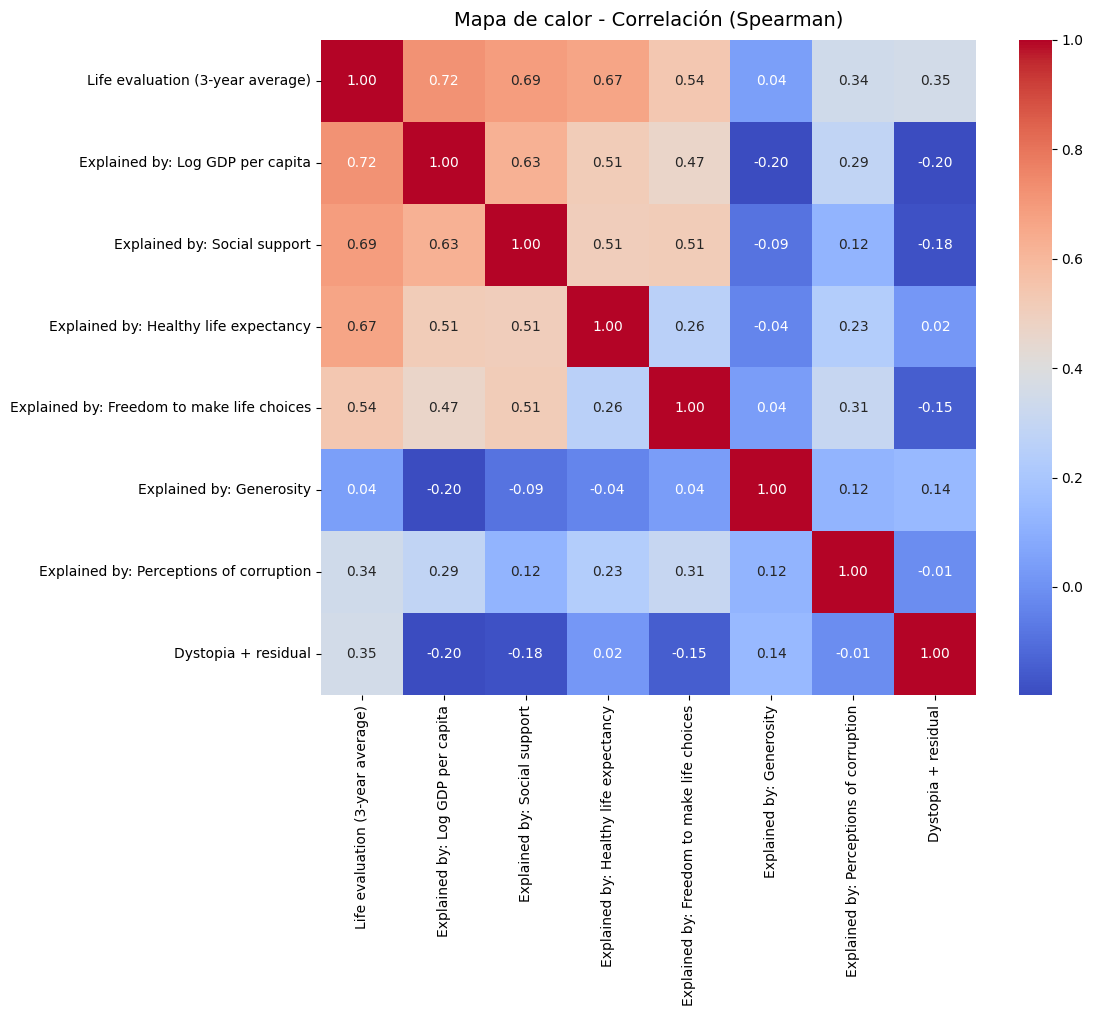

In [ ]:
data_filtrado = variables_limpias.drop(columns=['Year', 'Rank', 'Lower whisker', 'Upper whisker'])

data_numericas = data_filtrado.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(data_numericas.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Mapa de calor - Correlación (Spearman)", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


> Dado a que las variables, no presentan una distribución normal, se realizó un mapa de
calor de correlaciones de Spearman, en donde se pueda ver si tienen relaciones positivas,
negativas o no tienen relación entre sí.

●	Log GDP per capita (0.72), indica que a mayor ingreso per cápita, las personas tendrán mejor evaluación de vida. Esto porque mientras mayor sea el PIB generalmente se correlaciona con una mejor calidad de vida, como más empleo, mejores salarios y mayor acceso a bienes y servicios esenciales.

●	Social support (0.69), que indica que los países que sienten que tienen mayor apoyo social, aumenta su evaluación de vida, es decir, su felicidad.

●	Health life expectancy (0.67), que indica que los países que tienen en promedio mayor salud, van a ayudar al bienestar.

●	Freedom to make life choices (0.54), indicando que en los países que se sientan más libres de tomar sus propias decisiones, mejorarán su bienestar.

●	Perceptions of corruption (0.34), indicando que los países con menor corrupción percibida, tendrán más felicidad y bienestar.

●	Dystopia+residual (0.35), que indica que los factores que no son explicados por el resto de variables, tienen influencia en la felicidad de las personas.

●	Generosidad (0.04), es muy cercano a 0 su valor, indicando que casi no se relaciona con la felicidad.
De esta manera, se puede ver que las variables que explican más la felicidad son el ingreso per cápita, apoyo social y la salud.

Asimismo, se puede ver las variables que tienen relaciones fuertes como:

●	Log GDP per capita y social support (0.63), explicando cómo los países más ricos, suelen percibir mayor apoyo social sus propios ciudadanos.

●	Log GDP per capita y health life expectancy (0.51), explicando cómo los países más ricos, presentan mejor salud y bienestar.

●	Social support y healthy life expectancy (0.51), explicando cómo los países que perciben mayor apoyo social, tienen mejor salud.


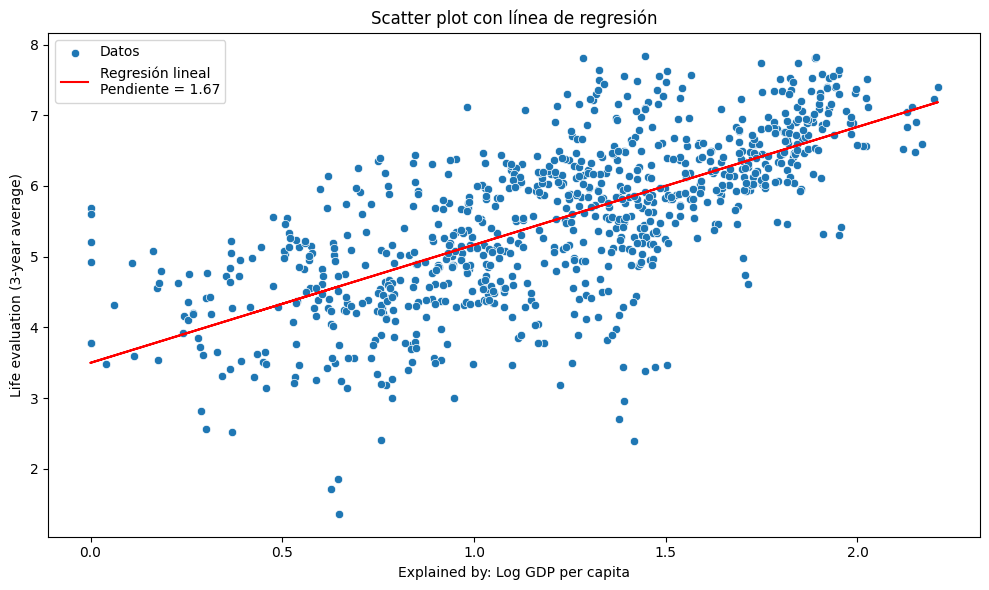

In [ ]:
data_filtrado = variables_limpias.drop(columns=['Year', 'Rank', 'Lower whisker', 'Upper whisker'])
data_numericas = data_filtrado.select_dtypes(include='number')

x_variable = 'Explained by: Log GDP per capita'
y_variable = 'Life evaluation (3-year average)'

x = data_numericas[x_variable].values.reshape(-1, 1)
y = data_numericas[y_variable].values

modelo = LinearRegression()
modelo.fit(x, y)
y_pred = modelo.predict(x)
pendiente = modelo.coef_[0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.flatten(), y=y, label='Datos')
plt.plot(x, y_pred, color='red', label=f'Regresión lineal\nPendiente = {pendiente:.2f}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('Scatter plot con línea de regresión')
plt.legend()
plt.tight_layout()
plt.show()

## 📍|  Correlaciones de las variables independientes con “Life evaluation”

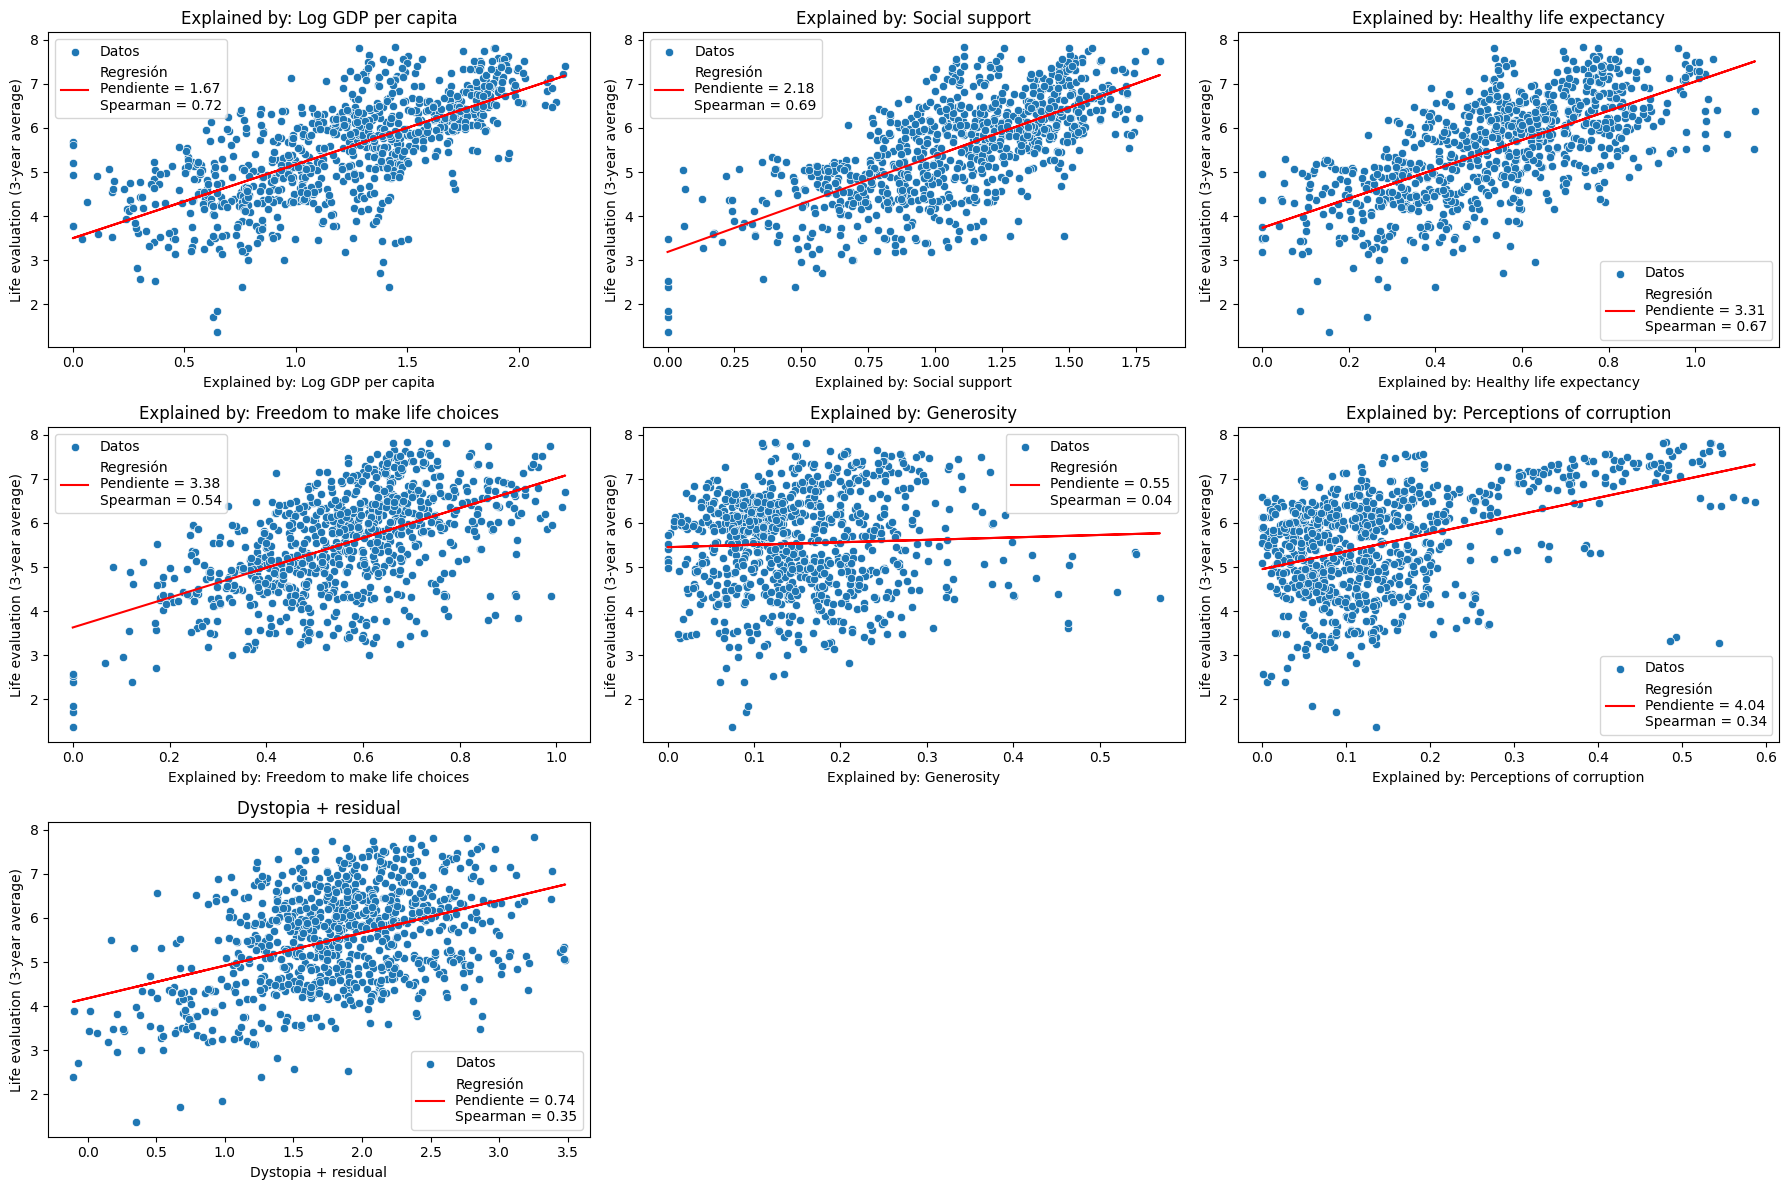

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import numpy as np

variables_explicativas = [
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
    "Dystopia + residual"
]

variable_dependiente = "Life evaluation (3-year average)"

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(variables_explicativas):
    x = variables_limpias[var].values.reshape(-1, 1)
    y = variables_limpias[variable_dependiente].values

    modelo = LinearRegression()
    modelo.fit(x, y)
    y_pred = modelo.predict(x)
    pendiente = modelo.coef_[0]

    r_spearman, _ = spearmanr(x.flatten(), y)

    sns.scatterplot(x=x.flatten(), y=y, ax=axes[i], label='Datos')
    axes[i].plot(x, y_pred, color='red',
                 label=f'Regresión\nPendiente = {pendiente:.2f}\nSpearman = {r_spearman:.2f}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(variable_dependiente)
    axes[i].set_title(var)
    axes[i].legend()

for j in range(len(variables_explicativas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Log GDP per capita: Se puede observar cómo los datos siguen una tendencia positiva, es decir, mientras más PIB per cápita tenga el país más feliz será, por lo que tendrá mejor evaluación de vida. Cuenta con una pendiente de 1.67 y una correlación positiva de 0.72, demostrando una correlación fuerte positiva entre ellas.

Social support: Se puede observar una tendencia positiva entre los datos, lo cual, a mayor apoyo social percibido por los ciudadanos, aumenta su bienestar. Cuenta con una pendiente de 2.18 y una correlación positiva de 0.69, siendo una correlación fuerte entre ellas.

Healthy life expectancy: Se puede observar que es una variable con una tendencia positiva, cuyo valor de la pendiente es 3.31. Esto indica que un pequeño aumento en la expectativa de vida de los ciudadanos, tendrá mejor evaluación de vida. Cuenta con una correlación de 0.67, demostrando que se relacionan entre sí.

Freedom to make life choices: Se puede observar la variable con tendencia positiva, es decir, que los ciudadanos que perciben mayor libertad para poder tomar decisiones de su vida, tendrán mejor bienestar. Cuenta con una pendiente de 4.04 y una correlación de 0.54, demostrando que si hay relación entre ellas.

Generosity: Se puede observar que esta variable cuenta con una pendiente de 0.55, la pendiente más pequeña y tiene una correlación de Spearman de 0.04, demostrando que casi no hay relación entre la variable bienestar y la generosidad.

Perception of corruption: Se puede observar que tiene el valor de la pendiente más alto. No obstante, tiene una correlación de 0.34 indicando una relación positiva, pero no tan fuerte como otras variables.

Dystopia + residual: se puede observar que se tiene una tendencia positiva, con una pendiente de 0.74 y una correlación de 0.35, de esa manera se puede concluir que la evaluación de la vida que no está explicada por las otras variables, tiene una relación positiva con el bienestar/ felicidad.

In [ ]:
ranking_freedom = data.sort_values(by="Explained by: Freedom to make life choices", ascending=False)
ranking_freedom[["Country name", "Explained by: Freedom to make life choices"]].head(5)

,Country name,Explained by: Freedom to make life choices
158,Belize,1.018
1918,Viet Nam,1.012
1067,Malaysia,0.991
268,Cambodia,0.988
563,Finland,0.986


## 📍 | Top 5 de las variables por países

/tmp/ipython-input-3066719202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_freedom_2024,


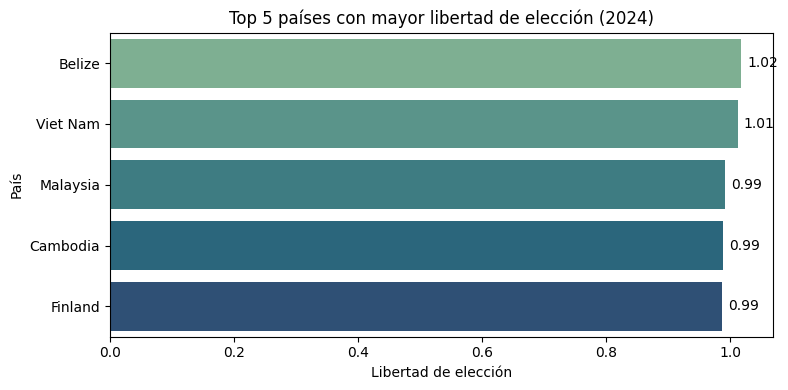

In [ ]:
data_2024 = data[data["Year"] == 2024]

top_freedom_2024 = data_2024[["Country name", "Explained by: Freedom to make life choices"]] \
                        .sort_values(by="Explained by: Freedom to make life choices", ascending=False) \
                        .head(5)

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=top_freedom_2024,
                 x="Explained by: Freedom to make life choices",
                 y="Country name",
                 palette="crest")

for i, v in enumerate(top_freedom_2024["Explained by: Freedom to make life choices"]):
    plt.text(v + 0.01, i, round(v, 2), va='center')

plt.title("Top 5 países con mayor libertad de elección (2024)")
plt.xlabel("Libertad de elección")
plt.ylabel("País")
plt.tight_layout()
plt.show()

La libertad de elección mide el promedio de respuesta de países de la pregunta: “¿Está satisfecho o insatisfecho con su libertad para elegir qué hacer con su vida?”, que se obtuvieron del Gallup World Poll. Esta encuesta mide la percepción individual de la libertad, no considera las leyes o política del país. En el caso de Belice, que, a pesar de ser un país pequeño, tienen una alta cohesión social y sienten que son libres. Por otra parte, Vietnam y Malasia, que están teniendo un crecimiento alto, datos que se pueden ver en el Fondo Monetario Internacional, pueden percibir mayor libertad de aceptar oportunidades laborales y personales. Y Finlandia, se puede deber a que tienen una red de seguridad social y buena gobernanza, que hace que sus ciudadanos perciban mayor libertad de elecciones.

/tmp/ipython-input-1477086980.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_gdp,


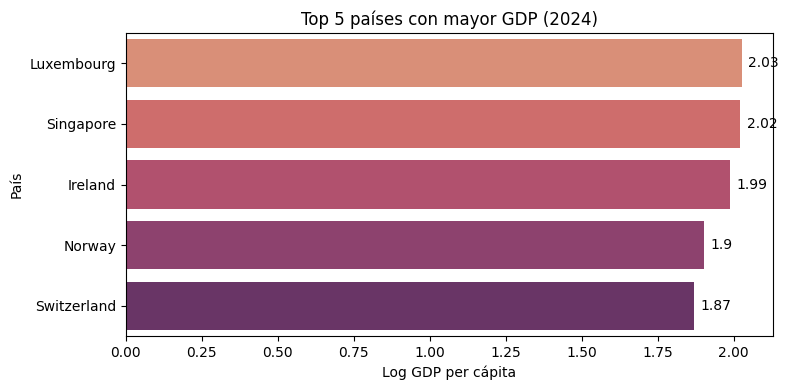

In [ ]:
data_2024 = data[data["Year"] == 2024]
top_gdp_2024 = data_2024.sort_values(by="Explained by: Log GDP per capita", ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

top_gdp = top_gdp_2024[["Country name", "Explained by: Log GDP per capita"]].head(5)

plt.figure(figsize=(8,4))
ax = sns.barplot(data=top_gdp,
                 x="Explained by: Log GDP per capita",
                 y="Country name",
                 palette="flare")

for i, v in enumerate(top_gdp["Explained by: Log GDP per capita"]):
    plt.text(v + 0.02, i, round(v, 2), va='center')

plt.title("Top 5 países con mayor GDP (2024)")
plt.xlabel("Log GDP per cápita")
plt.ylabel("País")
plt.tight_layout()
plt.show()

En este análisis, Luxemburgo lidera el top 5, con mayor PIB per cápita, que se debe gracias a las políticas económicas y el enfoque sostenible que tiene; lo cual no sólo ha hecho que aumente el PIB per cápita el 2024, sino que proyecta seguir teniendo ese puesto en el 2025.
Mientras que Singapur, a pesar de ser más pequeño que el resto de países, es uno de los más ricos, ya que tiene un “modelo económico que maximiza sus ventajas estratégicas mientras compensa completamente la ausencia de recursos naturales” (Icebook, s.f.).
Por lo que, de esa manera, estos países que entran en el top 5, tiene mayor PIB per cápita por sus modelos sostenibles y estratégicos, que han ayudado influido en tener mayor felicidad y bienestar en sus países.


In [ ]:
def grafico_top(df, columna, titulo, etiqueta_x):
    top = df.groupby("Country name")[columna].mean().nlargest(5).reset_index()

    plt.figure(figsize=(9,5))
    barras = sns.barplot(
        data=top,
        y="Country name",
        x=columna,
        orient="h",
        palette="coolwarm"
    )

    for i, valor in enumerate(top[columna]):
        plt.text(valor, i, f"{valor:.3f}", va='center')

    plt.title(titulo, fontsize=14, weight='bold')
    plt.xlabel(etiqueta_x)
    plt.ylabel("País")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3613211609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


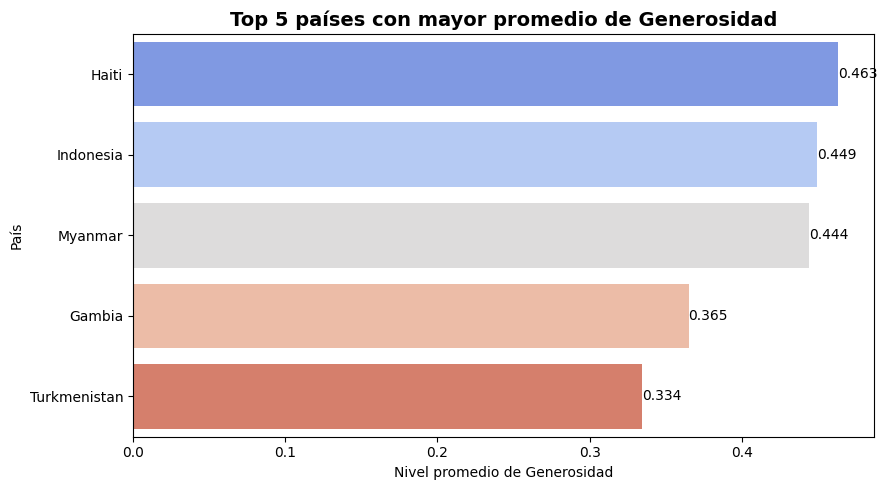

In [ ]:
grafico_top(
    data,
    "Explained by: Generosity",
    "Top 5 países con mayor promedio de Generosidad",
    "Nivel promedio de Generosidad"
)


La generosidad mide el promedio de respuesta de países a la pregunta: “¿Ha donado dinero a una organización benéfica en el último mes?”, y se enfoca en la propensión a la caridad y la ayuda mutua. El liderazgo mundial lo llevan Indonesia y Myanmar, lo cual está ligado a una fuerte cultura de donación religiosa y comunitaria, demostrando que este comportamiento es culturalmente intrínseco. La presencia de países como Gambia y Tailandia en el Top 5 también refleja la importancia de la cohesión social y las tradiciones de caridad.
Finalmente, se debe dar a notar que la generosidad es la variable con la menor correlación con la felicidad general (solo 0.04), lo que demuestra que este es un valor que opera independientemente de los factores estructurales del bienestar de una nación.




/tmp/ipython-input-3613211609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


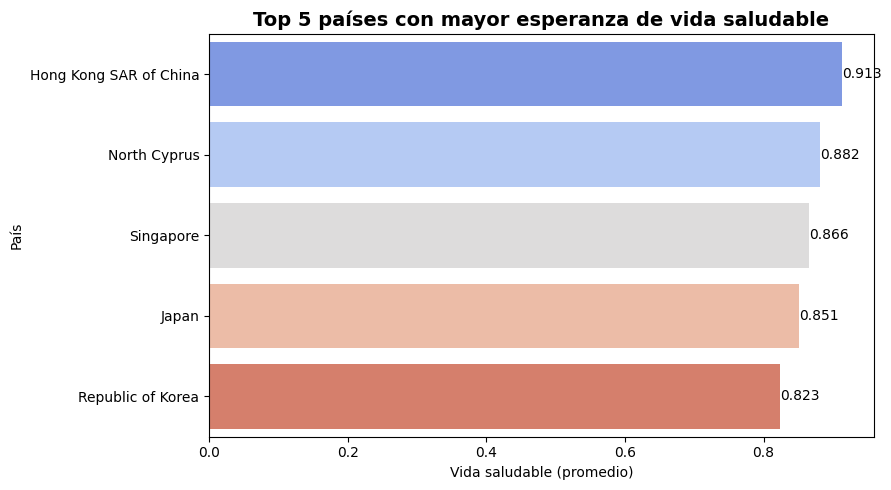

In [ ]:
grafico_top(
    data,
    "Explained by: Healthy life expectancy",
    "Top 5 países con mayor esperanza de vida saludable",
    "Vida saludable (promedio)"
)

La esperanza de vida saludable mide el número promedio de años que una persona puede esperar vivir con buena salud, reflejando la calidad del sistema de salud y las condiciones sanitarias generales del país. Esta variable tiene una fuerte correlación positiva con la felicidad, indicando que una mayor salud contribuye significativamente al bienestar. El Top 5 está dominado por naciones de Asia Oriental, con Hong Kong SAR de China, Singapur, Japón y República de Corea, que destacan por sus sistemas de salud avanzados, una dieta saludable y una alta cultura de longevidad. La presencia de Kosovo es notable, ya que, si bien no es una potencia económica, su alto puntaje sugiere una inversión exitosa en salud pública y prevención. El liderazgo general en esta métrica subraya que los países con mayor ingreso per cápita suelen presentar mejor salud, consolidando la salud como uno de los pilares fundamentales de la felicidad.

/tmp/ipython-input-3613211609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


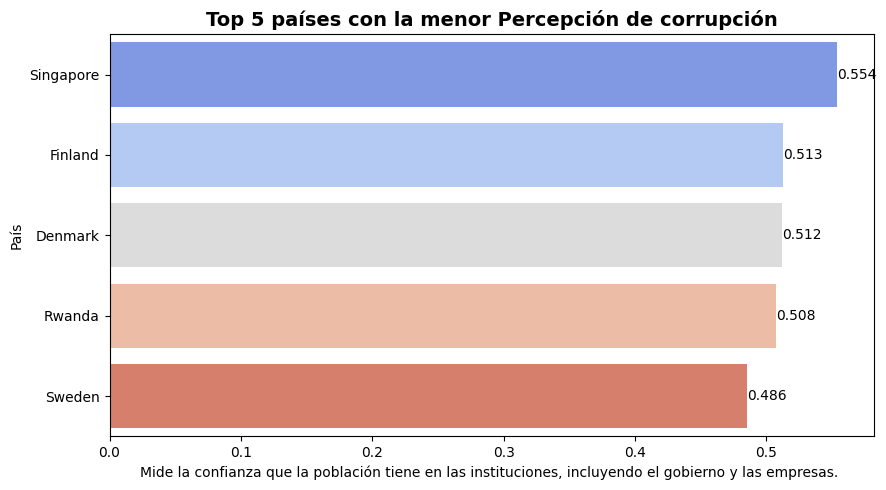

In [ ]:
grafico_top(
    data,
    "Explained by: Perceptions of corruption",
    "Top 5 países con la menor Percepción de corrupción",
    "Mide la confianza que la población tiene en las instituciones, incluyendo el gobierno y las empresas. "
)


Recordemos que Singapur, Finlandia y Dinamarca están entre los top 5 países por continentes que tienen el mayor Life evaluation.
La corrupción mina la felicidad porque desvía recursos que podrían haber mejorado como: educación, salud y seguridad; al no confiar en las instituciones, las personas viven con menos esperanza y más frustración; en última instancia, cuando el sistema falla, afecta el bienestar cotidiano y erosiona la sensación de justicia en la sociedad.
Por lo que mientras más baja sea esta percepción significa una mejor calidad de vida para los ciudadanos. Garantizando que los recursos públicos se utilicen de manera eficiente y transparente. Esto se refleja en servicios de salud y educación gratuitos y de alta calidad, infraestructura bien mantenida y una notable seguridad ciudadana, lo que contribuye directamente al bienestar y la confianza de sus habitantes.


/tmp/ipython-input-3613211609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


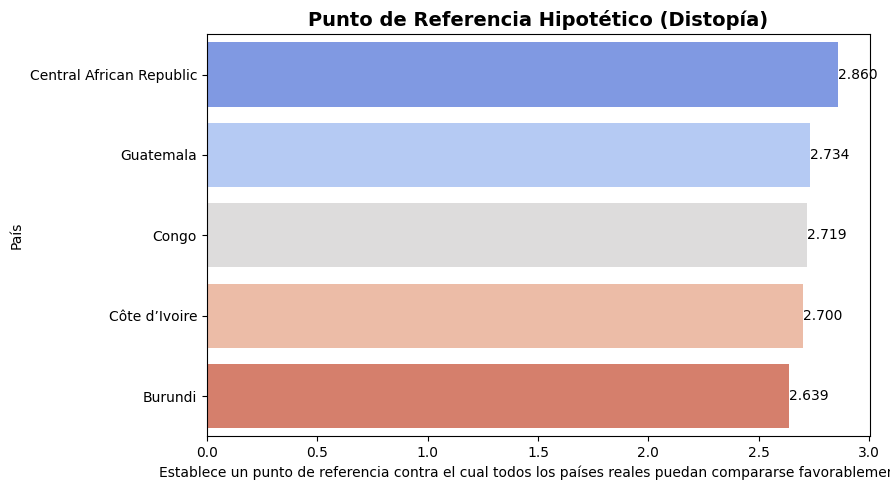

In [ ]:
grafico_top(
    data,
    "Dystopia + residual",
    "Punto de Referencia Hipotético (Distopía)",
    "Establece un punto de referencia contra el cual todos los países reales puedan compararse favorablemente. "
)


Teniendo en cuenta que un país distópico como sociedad ficticia e inestable en sí misma. Como, por ejemplo: ingresos extremadamente bajos, la esperanza de vida más corta, la menor generosidad, la mayor corrupción, la menor libertad y el menor apoyo social del mundo.
La República Central de África se puede percibir de esa manera, debido a su larga historia de conflictos y corrupción que ha resultado en una extrema pobreza, una profunda crisis humanitaria y un gobierno inestable.
No es raro catalogarlo como el país más triste del mundo. Existen casos diarios sobre violencia y control por grupos armados, crímenes de guerra y violencia sexual, reclutamiento y explotación de niños, colapso del estado de derecho y corrupción, y pobreza extrema y crisis humanitaria.
En general los países de esta lista comparten esos rasgos en términos sociales y políticos, que, a su vez, generan el efecto contrario de bienestar de los países.



/tmp/ipython-input-3613211609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


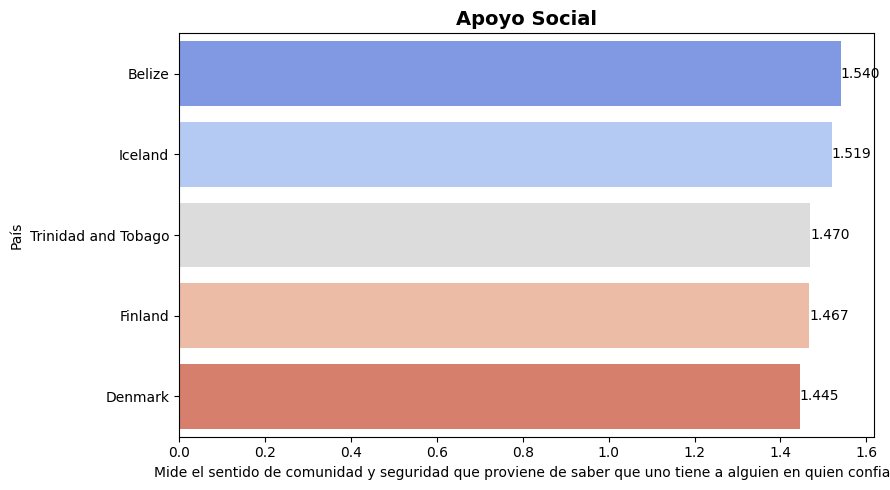

In [ ]:
grafico_top(
    data,
    "Explained by: Social support",
    "Apoyo Social",
    "Mide el sentido de comunidad y seguridad que proviene de saber que uno tiene a alguien en quien confiar."
)

Cuando existe mayor solidaridad comunitaria —confianza entre personas, participación activa, apoyo mutuo— se crea una red de relaciones que fortalece el bienestar individual porque reduce el aislamiento, genera sentido de pertenencia y facilita recursos sociales. Estudios en diversos países confirman que estas relaciones sociales elevadas se asocian con niveles más altos de felicidad.
Podríamos explicar la posición de Belice debido a la historia que hay detrás de su gente. Belice acogió migrantes centroamericanos aceptando la cultura comunitaria. La convivencia entre diversos grupos ha creado una identidad basada en la cooperación, las tradiciones compartidas y el apoyo mutuo ante los retos sociales y económicos.
En general los países de esta lista comparten varias características en común, entre ellas el bajo índice poblacional y sociedades cohesionadas donde prevalece un fuerte sentido de comunidad que favorece a una gestión pública más cercana y transparente. Fortaleciendo así la solidaridad, la calidad de vida de sus habitantes y confianza social.


## 📍 | Análisis bivariables y multivariables
Factores que explican la felicidad por continente

In [ ]:
continent_dict = {
    # 🌍 Europa
    "Albania":"Europe","Andorra":"Europe","Austria":"Europe","Belarus":"Europe",
    "Belgium":"Europe","Bosnia and Herzegovina":"Europe","Bulgaria":"Europe",
    "Croatia":"Europe","Cyprus":"Europe","Czechia":"Europe","Denmark":"Europe",
    "Estonia":"Europe","Finland":"Europe","France":"Europe","Germany":"Europe",
    "Greece":"Europe","Hungary":"Europe","Iceland":"Europe","Ireland":"Europe",
    "Italy":"Europe","Kosovo":"Europe","Latvia":"Europe","Lithuania":"Europe",
    "Luxembourg":"Europe","Malta":"Europe","Montenegro":"Europe","Netherlands":"Europe",
    "North Macedonia":"Europe","Norway":"Europe","Poland":"Europe","Portugal":"Europe",
    "Romania":"Europe","Russian Federation":"Europe","Serbia":"Europe","Slovakia":"Europe",
    "Slovenia":"Europe","Spain":"Europe","Sweden":"Europe","Switzerland":"Europe",
    "Türkiye":"Europe","Ukraine":"Europe","United Kingdom":"Europe",

    # 🌎 América del Norte
    "Canada":"North America","Costa Rica":"North America","Cuba":"North America",
    "Dominican Republic":"North America","El Salvador":"North America","Guatemala":"North America",
    "Honduras":"North America","Mexico":"North America","Panama":"North America",
    "Puerto Rico":"North America","United States":"North America","Belize":"North America",
    "Jamaica":"North America","Trinidad and Tobago":"North America",

    # 🌎 América del Sur
    "Argentina":"South America","Bolivia":"South America","Brazil":"South America",
    "Chile":"South America","Colombia":"South America","Ecuador":"South America",
    "Paraguay":"South America","Peru":"South America","Suriname":"South America",
    "Uruguay":"South America","Venezuela":"South America","Guyana":"South America",

    # 🌏 Asia
    "Afghanistan":"Asia","Armenia":"Asia","Azerbaijan":"Asia","Bahrain":"Asia",
    "Bangladesh":"Asia","Bhutan":"Asia","Brunei":"Asia","Cambodia":"Asia",
    "China":"Asia","Georgia":"Asia","Hong Kong SAR of China":"Asia","India":"Asia",
    "Indonesia":"Asia","Iran":"Asia","Iraq":"Asia","Israel":"Asia","Japan":"Asia",
    "Jordan":"Asia","Kazakhstan":"Asia","Kuwait":"Asia","Kyrgyzstan":"Asia",
    "Lao PDR":"Asia","Lebanon":"Asia","Malaysia":"Asia","Maldives":"Asia",
    "Mongolia":"Asia","Nepal":"Asia","Oman":"Asia","Pakistan":"Asia","Philippines":"Asia",
    "Qatar":"Asia","Republic of Korea":"Asia","Republic of Moldova":"Asia","Saudi Arabia":"Asia",
    "Singapore":"Asia","Sri Lanka":"Asia","State of Palestine":"Asia",
    "Taiwan Province of China":"Asia","Tajikistan":"Asia","Thailand":"Asia",
    "Turkmenistan":"Asia","United Arab Emirates":"Asia","Uzbekistan":"Asia",
    "Viet Nam":"Asia","Yemen":"Asia",

    # 🌍 África
    "Algeria":"Africa","Angola":"Africa","Benin":"Africa","Botswana":"Africa",
    "Burkina Faso":"Africa","Burundi":"Africa","Cameroon":"Africa",
    "Central African Republic":"Africa","Chad":"Africa","Comoros":"Africa",
    "Congo":"Africa","Côte d’Ivoire":"Africa","Djibouti":"Africa","DR Congo":"Africa",
    "Egypt":"Africa","Eswatini":"Africa","Ethiopia":"Africa","Gabon":"Africa",
    "Gambia":"Africa","Ghana":"Africa","Guinea":"Africa","Haiti":"Africa",
    "Kenya":"Africa","Lesotho":"Africa","Liberia":"Africa","Libya":"Africa",
    "Madagascar":"Africa","Malawi":"Africa","Mali":"Africa","Mauritania":"Africa",
    "Mauritius":"Africa","Mozambique":"Africa","Namibia":"Africa","Niger":"Africa",
    "Nigeria":"Africa","Rwanda":"Africa","Senegal":"Africa","Sierra Leone":"Africa",
    "Somalia":"Africa","South Africa":"Africa","South Sudan":"Africa","Sudan":"Africa",
    "Tanzania":"Africa","Togo":"Africa","Uganda":"Africa","Zambia":"Africa",
    "Zimbabwe":"Africa","Somaliland Region":"Africa",

    # 🌊 Oceanía
    "Australia":"Oceania","New Zealand":"Oceania"
}


In [ ]:
data['Continent'] = data['Country name'].map(continent_dict)

In [ ]:
promedio_continente = data.groupby('Continent')["Life evaluation (3-year average)"].mean().sort_values(ascending=False)
print(promedio_continente)

Continent
Oceania          7.223400
North America    6.346607
Europe           6.246814
South America    6.042463
Asia             5.345443
Africa           4.349144
Name: Life evaluation (3-year average), dtype: float64


**SCATTER** PLOTS BIVARIABLES POR PROMEDIO DE CONTINENTE

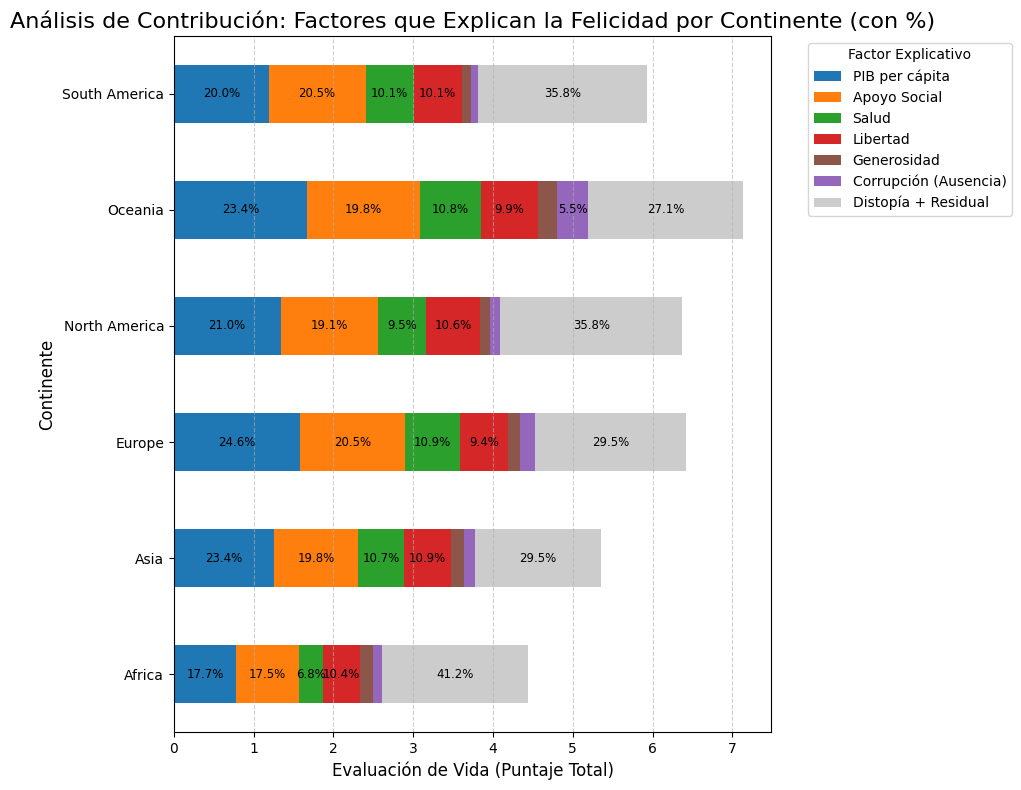

In [ ]:
variables_contribucion = [
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
    "Dystopia + residual"
]

data_limpio = data.dropna(subset=variables_contribucion + ['Continent'])
data_contribucion_continente = data_limpio.groupby('Continent')[variables_contribucion].mean()

data_contribucion_continente.columns = [
    'PIB per cápita',
    'Apoyo Social',
    'Salud',
    'Libertad',
    'Generosidad',
    'Corrupción (Ausencia)',
    'Distopía + Residual'
]

colores_contribucion = {
    'PIB per cápita': '#1f77b4',
    'Apoyo Social': '#ff7f0e',
    'Salud': '#2ca02c',
    'Libertad': '#d62728',
    'Corrupción (Ausencia)': '#9467bd',
    'Generosidad': '#8c564b',
    'Distopía + Residual': '#cccccc'
}

plt.figure(figsize=(12, 8))
ax = plt.gca()

data_contribucion_continente.plot(
    kind='barh',
    stacked=True,
    color=colores_contribucion,
    ax=ax
)

data_totales = data_contribucion_continente.sum(axis=1)

for bar_container in ax.containers:
    segment_lefts = np.array([p.get_x() for p in bar_container.patches])
    segment_widths = np.array([p.get_width() for p in bar_container.patches])
    segment_centers = segment_lefts + segment_widths / 2
    bar_y_pos = np.array([p.get_y() + p.get_height() / 2 for p in bar_container.patches])
    continent_indices = np.rint(bar_y_pos).astype(int)

    for i, p in enumerate(bar_container.patches):
        valor_contribucion = p.get_width()
        total_barra = data_totales.iloc[continent_indices[i]]

        porcentaje = (valor_contribucion / total_barra) * 100

        if porcentaje > 4.0:
            ax.text(
                segment_centers[i],
                bar_y_pos[i],
                f'{porcentaje:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=8.5
            )

plt.title("Análisis de Contribución: Factores que Explican la Felicidad por Continente (con %)", fontsize=16)
plt.xlabel("Evaluación de Vida (Puntaje Total)", fontsize=12)
plt.ylabel("Continente", fontsize=12)
plt.legend(title="Factor Explicativo", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Este gráfico de composición muestra la evaluación de vida (Puntaje total) promedio de cada continente y cómo se construye a partir de los seis factores explicativos, más el residual (Distopía + Residual).

Patrones de bienestar general:

•	Liderazgo de la felicidad: Oceanía (7.09), Norteamérica (6.4) y Europa (6.39) presentan los puntajes de felicidad total más altos (largura total de la barra), impulsados por la solidez en los tres pilares principales: PIB, apoyo social y salud.

•	Déficit de felicidad: África (4.41) y Asia (5.48) tienen las barras más cortas, indicando los niveles de bienestar más bajos, debido a la marcada reducción en la contribución del PIB per cápita.

Influencia de los factores explicativos:

•	PIB per cápita (Azul): Es el factor de contribución más grande en los continentes más ricos (Norteamérica, Oceanía y Europa), evidenciando que la riqueza económica es el principal motor de su alta felicidad. Su contribución es visiblemente menor en Asia y, sobre todo, en África, donde el impacto económico es mínimo.

•	Apoyo social (Naranja): Mantiene una contribución alta y notablemente estable a lo largo de todos los continentes, incluyendo a África y Sudamérica, lo que sugiere que las redes de apoyo (sociales y familiares) son un pilar fundamental y resiliente del bienestar, independientemente de la riqueza.

•	Salud (Verde): La contribución de la salud es significativa y constante en todos los continentes, siendo un factor de impacto medio-alto.

•	Generosidad (Café): El segmento de la generosidad es consistentemente el
más pequeño de los factores explicativos en todos los continentes, demostrando que tiene la menor influencia estadística en la construcción de la felicidad total, aunque su valor absoluto sea alto para ciertos países individuales.

•	Distopía + Residual (Gris): Este componente representa la base de la puntuación total y la porción de la felicidad que no es explicada por el modelo. Es el segmento más grande en todos los casos.

En conclusión, el gráfico muestra que la disparidad en la felicidad global está dominada por las diferencias en la contribución del PIB (Azul), mientras que el apoyo social (Naranja) y el residual (Gris) proporcionan una base estable al bienestar en todas las regiones.

*   **Generosidad vs Evaluación de vida (Por continente)**


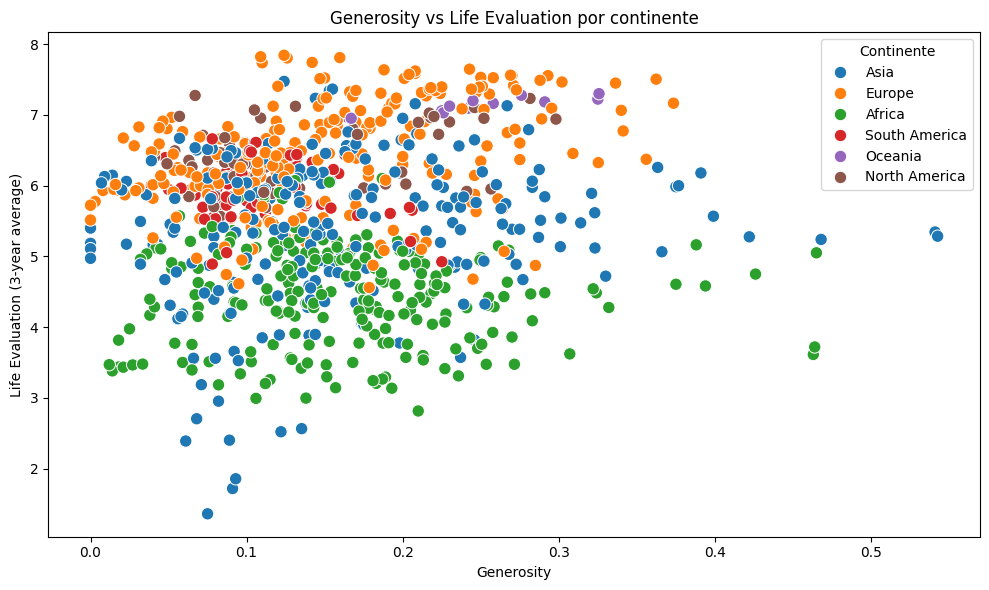

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x="Explained by: Generosity",
    y="Life evaluation (3-year average)",
    hue="Continent",
    palette="tab10",
    s=80
)
plt.title("Generosity vs Life Evaluation por continente")
plt.xlabel("Generosity")
plt.ylabel("Life Evaluation (3-year average)")
plt.legend(title="Continente")
plt.tight_layout()
plt.show()


El gráfico de dispersión de Generosidad vs. Evaluación de Vida revela una correlación general muy baja entre ambas variables (coeficiente de 0.04). La nube de puntos es dispersa, sin una tendencia lineal clara, lo que confirma que el comportamiento altruista (medido por la donación de dinero) no es un predictor significativo del nivel de felicidad general de un país.

Patrones continentales:

•	Europa (Naranja): Los países europeos, aunque no lideran en generosidad, se agrupan consistentemente en los valores más altos de evaluación de vida, demostrando que su felicidad se debe a factores estructurales como el PIB per cápita y el apoyo social, y no a la generosidad.

•	Asia (Azul): Los países asiáticos muestran la mayor dispersión en generosidad, incluyendo a los líderes globales como Indonesia y Myanmar, aunque su nivel de felicidad es mixto. Esto subraya que su alta generosidad es un factor cultural intrínseco que opera independientemente del bienestar estructural.

•	África (Verde): Los países africanos se concentran en el rango más bajo de evaluación de vida, independientemente de sus niveles de generosidad.
En resumen, la gráfica es una prueba visual de que la generosidad es el factor con menor peso explicativo en el modelo de felicidad, con los mayores niveles de bienestar impulsados por el desarrollo económico y el apoyo social.


*   **Esperanza de vida saludable vs Evaluación de Vida (Por continente)**





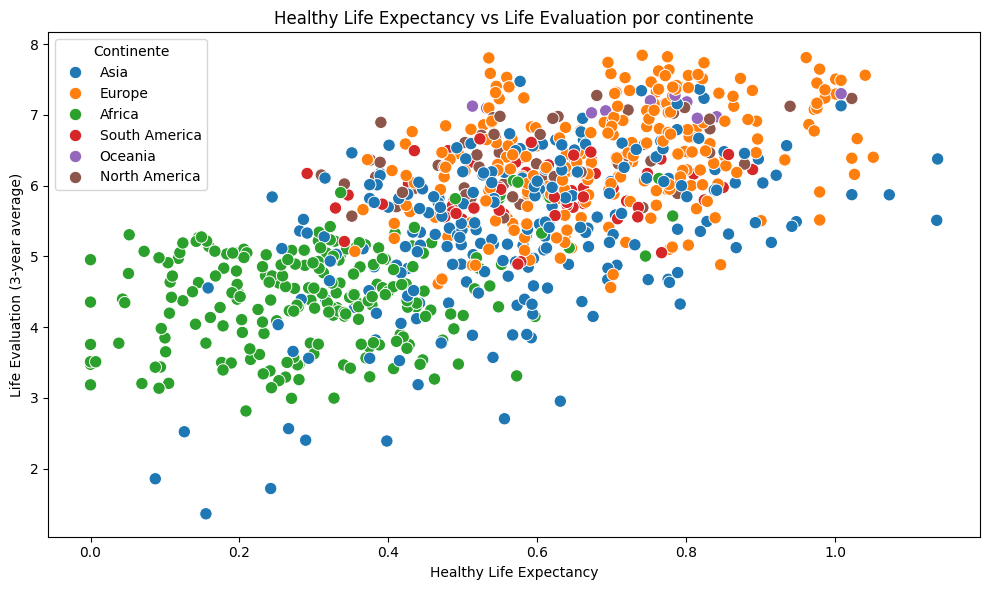

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x="Explained by: Healthy life expectancy",
    y="Life evaluation (3-year average)",
    hue="Continent",
    palette="tab10",
    s=80
)
plt.title("Healthy Life Expectancy vs Life Evaluation por continente")
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Life Evaluation (3-year average)")
plt.legend(title="Continente")
plt.tight_layout()
plt.show()

El gráfico de dispersión de Esperanza de Vida Saludable vs. Evaluación de Vida ilustra una fuerte correlación positiva entre ambas variables (coeficiente de 0.67). La tendencia es clara: a mayor esperanza de vida saludable, mayor es el puntaje de felicidad percibida. Esto confirma que la salud y la longevidad son pilares fundamentales del bienestar, justo detrás del PIB y el Apoyo Social.

Patrones continentales:

•	Liderazgo en Salud y Felicidad: Los países de Europa (Naranja) y Norteamérica (Amarillo) se concentran en la esquina superior derecha, con los mayores niveles tanto en esperanza de vida como en evaluación de vida (por encima de 6.5). Esto se debe a sus sistemas de salud avanzados y a la estabilidad económica que financia el bienestar.

•	Desafío en África: El continente africano (Verde) se agrupa en el extremo inferior izquierdo, con los menores puntajes en ambas variables. Este patrón evidencia que las limitaciones en la infraestructura de salud impactan directamente la calidad y duración de la vida, siendo un obstáculo estructural para la felicidad.

•	Asia (Salud sin máxima felicidad): Algunos países de Asia (Azul) muestran altos puntajes de esperanza de vida (especialmente en la zona superior de la gráfica), acercándose a los niveles europeos, pero con una felicidad total más moderada. Esto sugiere que, si bien han logrado éxitos en longevidad (Japón, Singapur), otros factores como el apoyo social o la libertad de elección podrían no ser tan fuertes como en Europa.
En pocas palabras, la gráfica prueba que una población sana y longeva es una condición necesaria para alcanzar los niveles más altos de felicidad.


## 😌 | Top 5 países más felices por continente

In [ ]:
top5_por_continente = data.groupby(['Continent','Country name'])["Life evaluation (3-year average)"].mean().reset_index()
top5_por_continente = top5_por_continente.sort_values(['Continent','Life evaluation (3-year average)'], ascending=[True, False])
top5_por_continente = top5_por_continente.groupby('Continent').head(5)
print(top5_por_continente)

         Continent          Country name  Life evaluation (3-year average)
30          Africa             Mauritius                          5.789100
25          Africa                 Libya                          5.534817
0           Africa               Algeria                          5.415854
34          Africa               Nigeria                          4.963315
40          Africa          South Africa                          4.947238
62            Asia                Israel                          7.252662
88            Asia  United Arab Emirates                          6.756369
74            Asia                  Oman                          6.634333
81            Asia             Singapore                          6.516777
77            Asia                 Qatar                          6.477714
103         Europe               Finland                          7.646900
101         Europe               Denmark                          7.605431
119         Europe       

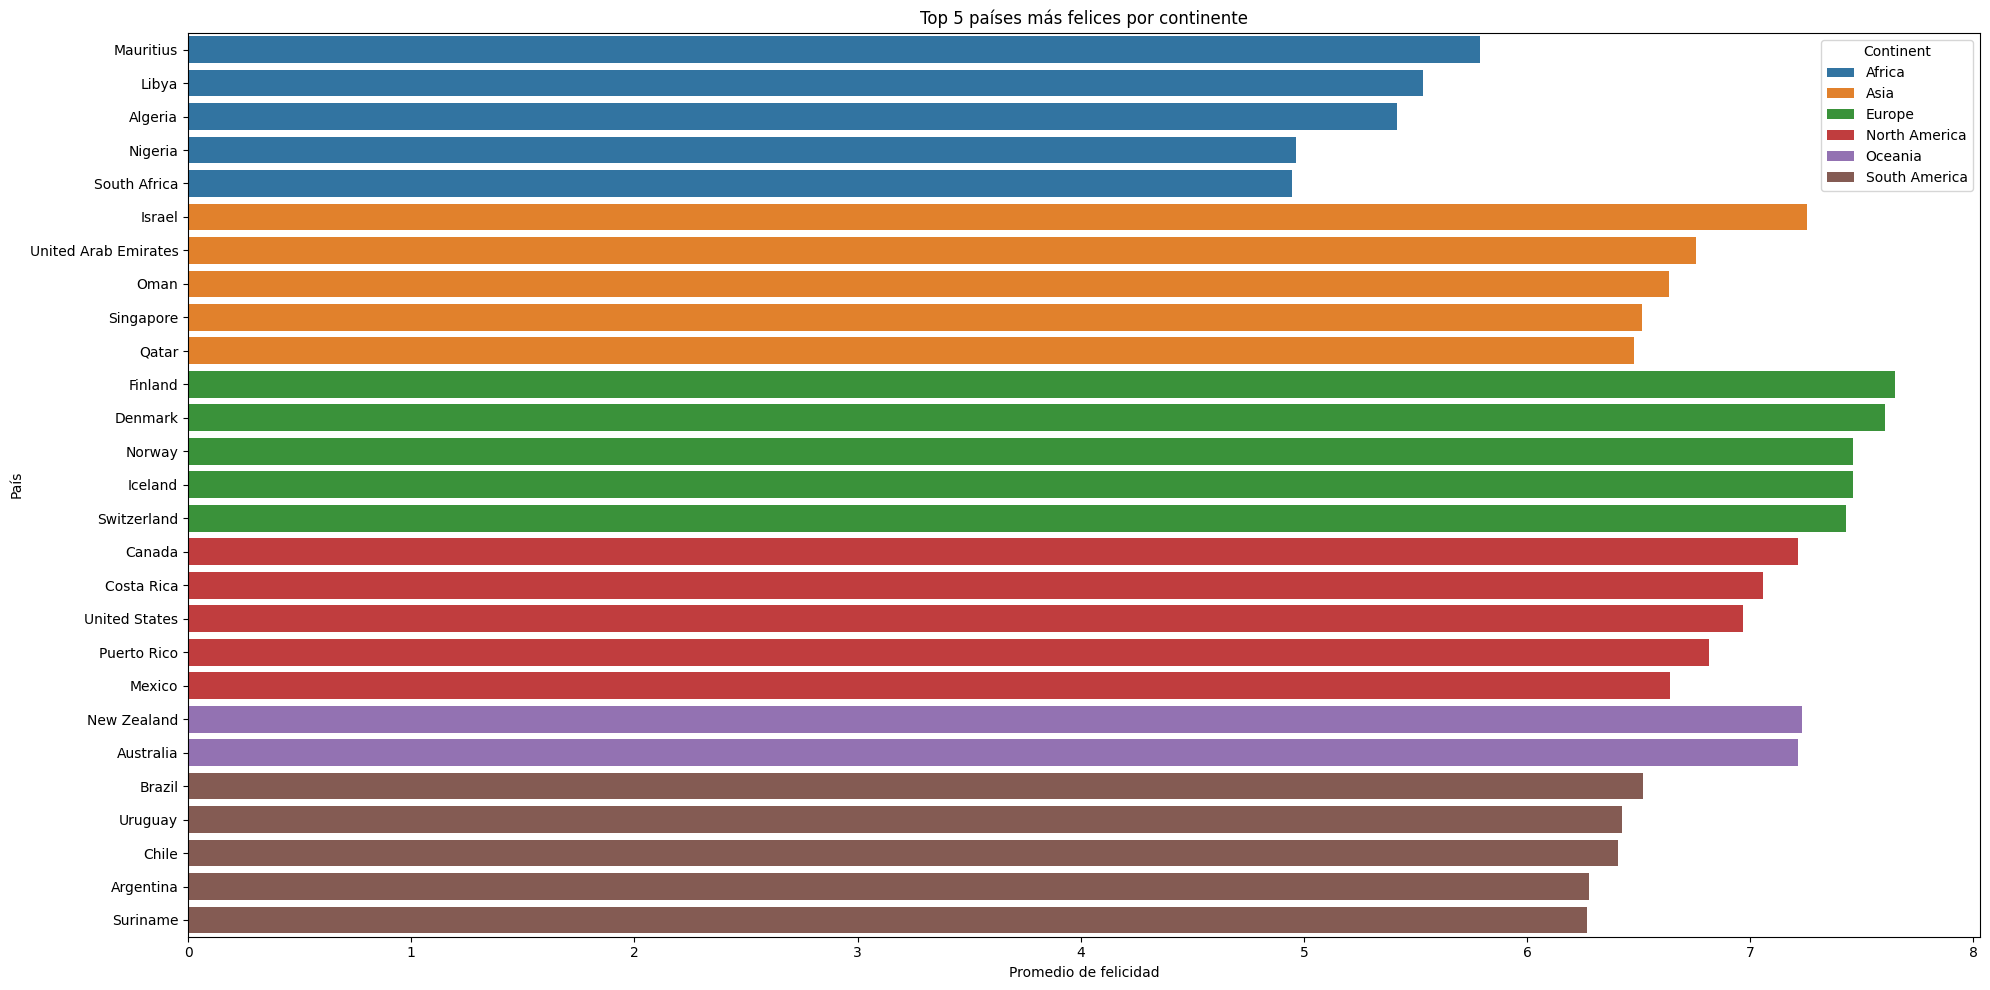

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=top5_por_continente, x="Life evaluation (3-year average)", y="Country name", hue="Continent", dodge=False)
plt.title("Top 5 países más felices por continente")
plt.xlabel("Promedio de felicidad")
plt.ylabel("País")
plt.tight_layout()
plt.show()

Según el análisis visual de los Top 5 países por continente basándose en el promedio de Evaluación de Vida, revela la concentración geográfica de la felicidad y las disparidades regionales.

Patrones de felicidad continental:

•	Predominio de Europa: Los países europeos lideran el ranking global con las puntuaciones más altas, lo que se atribuye a su estabilidad económica, sistemas de bienestar social y baja corrupción percibida.

•	Liderazgo de Oceanía: Nueva Zelanda y Australia demuestran puntajes altos, confirmando que la combinación de alto PIB y calidad de vida son la fórmula para la máxima satisfacción.

•	América: Las naciones de América del Norte (Canadá, Costa Rica, EE.UU.) y América del Sur (Uruguay, Chile y Argentina) presentan puntajes en el rango medio. Este desempeño, especialmente en Sudamérica, es a menudo impulsado por altos niveles de apoyo social, lo que llega a mitigar los efectos de menos ingresos o mayor corrupción.

•	Concentración en Asia y África: Los países líderes en Asia y África se agrupan en la parte media-baja del ranking global. Si bien Israel y Singapur demuestran un alto PIB, el resto de los países africanos y asiáticos enfrentan desafíos para mantener sus promedios en los rangos más altos. Esto resalta la brecha de desarrollo donde la falta de solidez en los factores básicos limita el bienestar.


## 📍 | Análisis a través del tiempo
Variabilidad en el tiempo de los países latinoamericanos

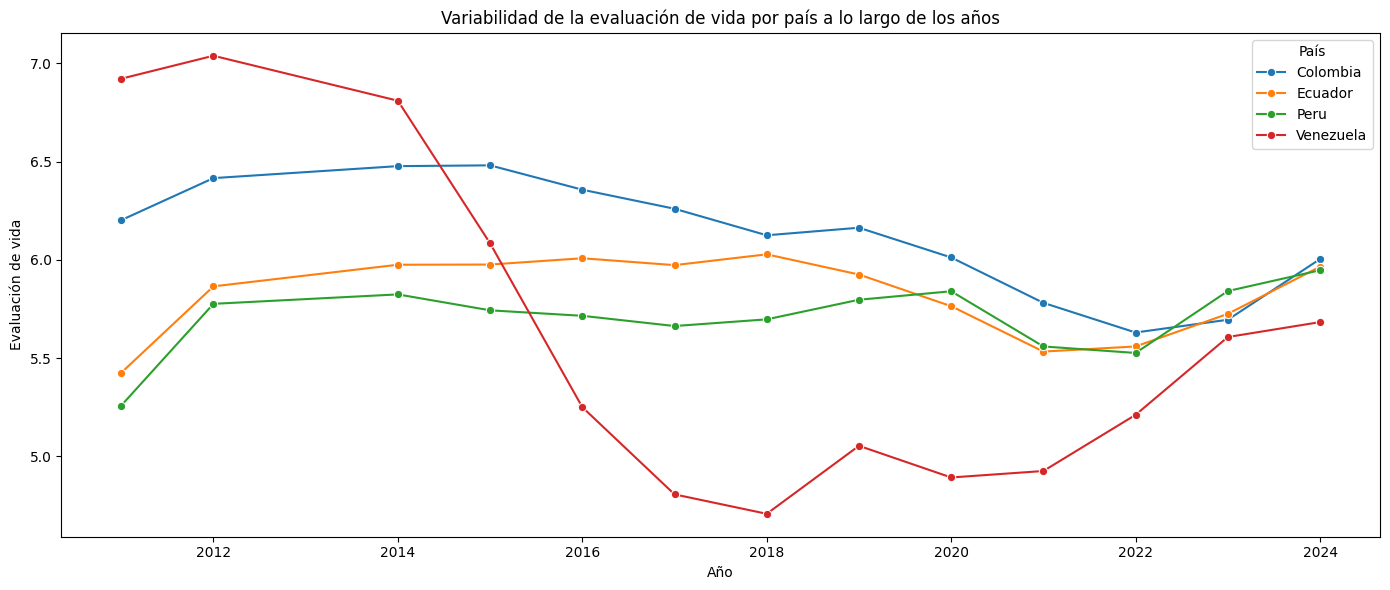

In [ ]:
paises_seleccionados = ["Venezuela", "Ecuador", "Colombia", "Peru"]

data_paises = data[data["Country name"].isin(paises_seleccionados)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=data_paises, x="Year", y="Life evaluation (3-year average)", hue="Country name", marker="o")
plt.title("Variabilidad de la evaluación de vida por país a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Evaluación de vida")
plt.legend(title="País")
plt.tight_layout()
plt.show()


Ecuador es un país Sudamericano, que fronteriza con Colombia y Perú, países que, junto con Venezuela, se analizará y comparará la situación de Ecuador, sobre su nivel de felicidad, comparándolo con países con estándares o indicadores similares.

Ecuador ha presentado diferentes fluctuaciones a lo largo de los años, pero en la mayoría ha sido estable considerando con el resto de países. Entre lo que se alcanza a ver con una tendencia de crecimiento del 2012 al 2015, que alcanzó hasta un valor de 6, que luego disminuyó en 2021, hasta un 5.5, que puede deberse a la pandemia del COVID-19, para posteriormente volver a crecer, hasta tener un pico de 6 en el 2024.

No obstante, Colombia ha demostrado tener mayores niveles de la evaluación de vida que Ecuador, alcanzando un valor máximo de hasta 6.5 en el 2015. Mientras que Perú, ha tenido un nivel de evaluación de vida, menor a Ecuador hasta el 2020, que superó a Ecuador en un valor de 6, pero que lamentablemente volvió a caer por la pandemia.

Finalmente, Venezuela, demostró tener en el 2012 un alto nivel de evaluación de vida, pero con el tiempo disminuyó drásticamente, esto es principalmente porque su PIB per cápita, que decreció a tal punto que afectará a otros factores que explican la felicidad y bienestar de las personas.


## ☀️ | ECUADOR

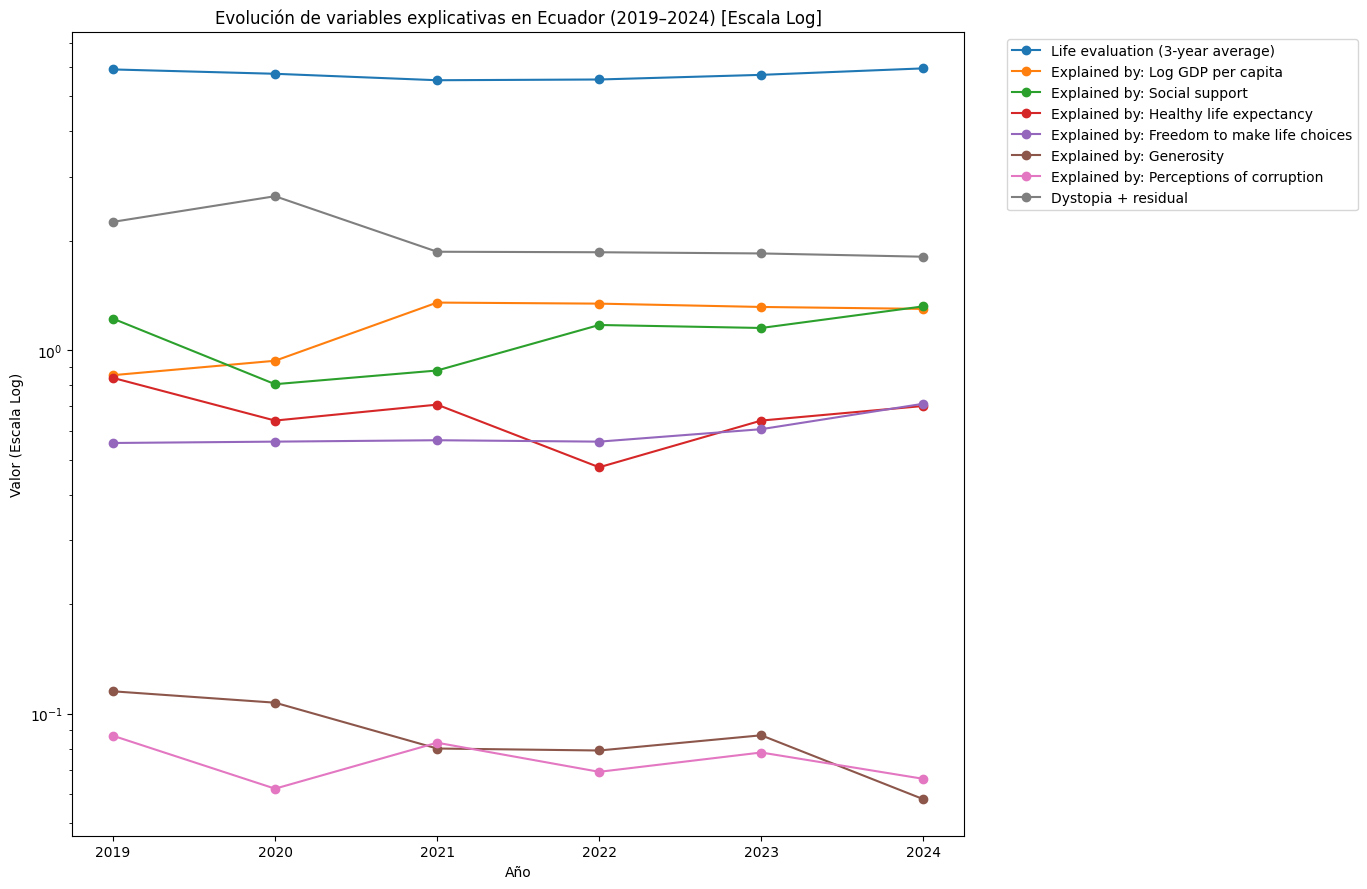

In [ ]:
data_Ecuador = data[
    (data["Country name"] == "Ecuador") &
    (data["Year"].between(2019, 2024))
]

import matplotlib.pyplot as plt
import numpy as np

variables = [
    "Life evaluation (3-year average)",
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
    "Dystopia + residual"
]

plt.figure(figsize=(15, 9))

epsilon = 1e-4

for var in variables:
    plt.plot(data_Ecuador["Year"], data_Ecuador[var] + epsilon, marker='o', label=var)

plt.yscale("log")
plt.title("Evolución de variables explicativas en Ecuador (2019–2024) [Escala Log]")
plt.xlabel("Año")
plt.ylabel("Valor (Escala Log)")
plt.legend(loc="upper right", bbox_to_anchor=(1.45, 1))
plt.tight_layout()
plt.show()

Para este análisis, se convirtieron los valores en logaritmo natural, para visualizar de mejor manera los efectos que han tenido las variables a través de los años.

Comenzando con el análisis del bienestar (Evaluación de vida); Ecuador demostró tener una ligera caída en el periodo de la pandemia, que fue en el 2019 hasta el 2022, para luego comenzar a incrementar aquel bienestar.
Además, se pueden ver las dos variables que influyen en gran medida al bienestar que es log PIB per cápita, que aumentó hasta el 2022, es decir, que el PIB comenzó a crecer post pandemia y se mantuvo estable hasta el resto de los años; y el apoyo social, que tuvo una caída en el 2020, por la crisis de salud que se tuvo por una pandemia, pero a partir de ese año comenzó aumentar.  

Por otra parte, factores como la expectativa de vida saludable y libertad de elección influyen moderadamente en el bienestar. Por una parte, la expectativa de vida saludable ha tenido varias fluctuaciones, en el caso del 2020 por la crisis sanitaria que incrementó el número de muerto disminuyó; luego aumentó en el 2021 por el confinamiento, hasta el 2023 que volvió a decrecer por la nueva variante del Ómicron. Mientras que la libertad de elección se mantiene estable al pasar de los años, no se ven diferentes cambios como otras variables.

Por otro lado, las variables generosidad y percepción de la corrupción son factores con menor contribución, pero en el caso de la generosidad ha disminuido notoriamente, esto se puede deber a las crisis económicas del país, disminuyendo la disposición a donar; mientras que la percepción de corrupción cae en diferentes años como 2020 y 2024, indicando que los ciudadanos perciben mayor corrupción, lo que dificulta el bienestar de las personas.

En el caso de la distopía y residuos, primero muestra una disminución entre el 2020 y 2021, para luego mostrar ligera estabilidad. Este componente se puede deber a otros factores que influyen en la felicidad y bienestar como emociones, seguridad, mejores políticas públicas que influyen en el bienestar y felicidad de las personas.


In [ ]:
data1_2024 = data[data["Year"] == 2024]
import plotly.express as px

fig = px.choropleth(
    data1_2024,
    locations="Country name",
    locationmode="country names",
    color="Life evaluation (3-year average)",
    hover_name="Country name",
    color_continuous_scale=[
        "#fce4ec",
        "#f8bbd0",
        "#f48fb1",
        "#ec407a",
        "#ad1457"
    ],
    title="Mapa mundial de felicidad (2024)"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()



Visualización por países de la evaluación de vida / bienestar del 2024.

**Conclusiones**

•	Entre las variables que explican fuertemente el bienestar subjetivo es el PIB per cápita, el apoyo social y la esperanza de vida saludable.

•	La generosidad y la percepción de corrupción tienen menor relación y peso explicativo con la variable dependiente felicidad (evaluación de vida).

•	Las distribuciones muestran que los países analizados en la data, se agrupan en niveles medios-alto de felicidad, con ciertos sesgos en algunas variables.

•	Por medio de la correlación de Spearman se corrobora la relación positiva de entre la felicidad y otros factores como ingreso per cápita, salud y libertad.

•	Entre continentes existen diferencias claras, como Europa y Oceanía, que lideran en nivel de felicidad, mientras que África y Asia enfrentan desafíos estructurales para aumentar los niveles de bienestar.

•	Ecuador ha demostrado ser un país resiliente, lo suficiente para mostrar mejorías en los ingresos postpandemia y recuperar la estabilidad en sus indicadores y niveles de bienestar.


**Recomendaciones**

•	Para ayudar a fortalecer el bienestar y felicidad de los países se sugiere proponer y reforzar las políticas públicas para mejorar el ingreso per cápita, el acceso a la salud y el apoyo social.

•	Promover la transparencia institucional para reducir la percepción de corrupción y aumentar la confianza en los ciudadanos.

•	Fomentar programas de salud preventiva, bienestar emocional, estrategias educativas y cohesión social.

•	Seguir realizando futuros análisis multivariables con la base de datos e incorporar nuevas variables o factores que influyan en la felicidad para estimarla de mejor manera.


**Fuentes bibliográficas**

●	Zúñiga Tapia, F. (2023, 30 octubre). ¿El mejor sistema de pensión del mundo? Estos son los beneficios de jubilar en Finlandia. BioChile. https://www.biobiochile.cl/noticias/servicios/explicado/2023/10/30/el-mejor-sistema-de-pension-del-mundo-estos-son-los-beneficios-de-jubilar-en-finlandia.shtml

●	Imperial Citizenship. (2025, mayo 4). Luxembourg: The richest country in the world based on GDP per capita in 2025. Imperial Citizenship. https://imperialcitizenship.com/blog/luxembourg-richest-country-gdp-per-capita-2025/

●	iceebook. (s. f.). Por qué Singapur es uno de los países más ricos del mundo pese a su pequeño tamaño. IceeBook. https://iceebook.com/por-que-singapur-es-uno-de-los-paises-mas-ricos-del-mundo-pese-a-su-pequeno-tamano  

●	Lee, J.-E., & Bae, S.-M. (2022). The Relationship Between Social Capital, the Happiness of Others, and the Happiness of Korean Adults: A National Sample Study. Psychiatry Investigation, 19(11), 958-964. https://doi.org/10.30773/pi.2022.0050.  

●	Josecarlos.Rodriguez. (2018, 25 septiembre). República Centroafricana, el país más triste del mundo. Fronterad. https://www.fronterad.com/republica-centroafricana-el-pais-mas-triste-del-mundo/

●	La generosidad. (s/f). Islamreligion.com. Recuperado el 8 de noviembre de 2025, de https://www.islamreligion.com/es/articles/1668/la-generosidad

●	Martinez, J. (2015, 22 agosto). El Indice Mundial de Generosidad: qué es y cómo está Latinoamérica y Centroamérica. Consulting Group. Data Análisis con centralidad en los países latinoamericanos. https://www.latam-consulting.com/2015/08/el-indice-mundial-de-generosidad-que-es.html

●	(S/f). Weforum.org. Recuperado el 8 de noviembre de 2025, de https://es.weforum.org/stories/2019/01/cuales-son-los-paises-mas-generosos-y-no-son-los-que-mas-dinero-tienen/

●	Tarin, K. (2025, abril 15). Luxemburgo: el país más rico del mundo por PIB per cápita en 2025. Imperial Citizenship. https://imperialcitizenship.com/es/blog/luxembourg-richest-country-gdp-per-capita-2025/
